In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [21]:
def bestPerf(EXP, data_type):
    best = pd.DataFrame(columns = ('data_type', 'forecasting_horizon', 'normalization', 'traj', 'clipped',
                                   'seq_len', 'img_size', 'trial_no', 'epoch', 
                                   'val_mape', 'val_mae', 'val_rmse', 'test_mape', 'test_mae', 'test_rmse', 'train_time'))
    
    i = 0
    
    for EXP_NO in EXP:
        log_files = os.listdir('log/' + EXP_NO + '/')
        all_logs = [files for files in log_files]

        for forecasting_horizon in [1]:
            for dataType in data_type:
                EXP = str(forecasting_horizon) + 'hours_dataType' + str(dataType)
                print 'progress: %i / %i' %(len([f for f in all_logs if f.startswith(EXP)]),
                                            pd.read_csv('model/' + str(EXP_NO) + '.csv').shape[0])
                for f in [f for f in all_logs if f.startswith(EXP)]:
                    result = pd.read_csv('log/' + EXP_NO + '/' + f, index_col=0)

                    if 'img0' in f.split('_'):
                        img_size = 0
                    elif 'img3' in f.split('_'):
                        img_size = 3
                    elif 'img11' in f.split('_'):
                        img_size = 11
                    elif 'img21' in f.split('_'):
                        img_size = 21
                    elif 'img41' in f.split('_'):
                        img_size = 41

                    if 'seq6' in f.split('_'):
                        seq_len = 6
                    elif 'seq12' in f.split('_'):
                        seq_len = 12
                    elif 'seq24' in f.split('_'):
                        seq_len = 24

                    if 'normalization0' in f.split('_'):
                        norm = 'simple_const'
                    elif 'normalization1' in f.split('_'):
                        norm = 'spdLimit'
                    elif 'normalization2' in f.split('_'):
                        norm = 'spdLimit_double'
                    elif 'normalizationraw' in f.split('_'):
                        norm = 'raw'
                        
                    if 'trajall' in f.split('_'):
                        traj = 'all'
                    else:
                        traj = 'known'
                    
                    if 'clipped' in f.split('_'):
                        clipped = 'yes'
                    else:
                        clipped = 'no'
                        

                    best.loc[i] = [dataType, forecasting_horizon, norm, traj, clipped, 
                                  str(seq_len), str(img_size), 0] + result.loc[result['val_mape'].idxmin()].values.tolist()

                    i += 1
                
    return best.loc[best.groupby(['data_type', 'forecasting_horizon'])['val_mape'].idxmin()][
        ['data_type', 'forecasting_horizon', 'normalization', 'traj', 'clipped', 'seq_len', 'img_size', 'epoch', 
         #'val_mape', 'val_mae', 'val_rmse',
         'test_mape', 'test_mae', 'test_rmse']]

In [31]:
bestPerf(['cnnlstm_22'], [22])

progress: 12 / 12


,data_type,forecasting_horizon,normalization,traj,clipped,seq_len,img_size,epoch,test_mape,test_mae,test_rmse
2,22,1,raw,known,no,6,21,19.0,0.100759,2.306044,3.174479


In [44]:
bestPerf(['3dcnn_all'], [31, 32, 33, 34, 35])

progress: 0 / 120
progress: 12 / 120
progress: 12 / 120
progress: 5 / 120
progress: 0 / 120


,data_type,forecasting_horizon,normalization,traj,clipped,seq_len,img_size,epoch,test_mape,test_mae,test_rmse
4,32,1,raw,known,no,6,21,17.0,0.124489,2.935784,3.949211
20,33,1,raw,all,no,6,21,14.0,0.111312,2.568371,3.471229
24,34,1,raw,all,no,6,21,9.0,0.112725,2.646774,3.570014


In [42]:
bestPerf(['ndlstm_all'], [31, 32, 33, 34, 35])

progress: 12 / 108
progress: 12 / 108
progress: 12 / 108
progress: 12 / 108
progress: 12 / 108


,data_type,forecasting_horizon,normalization,traj,clipped,seq_len,img_size,epoch,test_mape,test_mae,test_rmse
5,31,1,raw,known,no,6,21,13.0,0.105963,2.487238,3.445790
16,32,1,raw,known,no,6,21,13.0,0.105527,2.476606,3.432879
31,33,1,raw,known,no,6,21,15.0,0.105412,2.469926,3.419311
39,34,1,raw,known,no,6,21,13.0,0.105597,2.492857,3.443289
57,35,1,raw,known,no,6,21,13.0,0.105366,2.487707,3.438352


In [10]:
def sensitivityPlot(EXP, data_type, forecasting_horizon):
    best = pd.DataFrame(columns = ('model', 'data_type', 'forecasting_horizon', 'seq_len', 'img_size',
                                   'trial_no', 'epoch', 'train_mape', 'train_mae', 'train_rmse',
                                   'val_mape', 'val_mae', 'val_rmse', 'test_mape', 'test_mae', 'test_rmse', 'train_time'))
    
    i = 0
    
    for EXP_NO in EXP:
        log_files = os.listdir('log/' + EXP_NO + '/')
        all_logs = [files for files in log_files]

        for dataType in data_type:
            EXP = str(forecasting_horizon) + 'min_dataType' + str(dataType)
            print len([f for f in all_logs if f.startswith(EXP)])
            for f in [f for f in all_logs if f.startswith(EXP)]:
                result = pd.read_csv('log/' + EXP_NO + '/' + f, index_col=0)

                if 'img0' in f.split('_'):
                    img_size = 0
                elif 'img3' in f.split('_'):
                    img_size = 3
                elif 'img11' in f.split('_'):
                    img_size = 11
                elif 'img21' in f.split('_'):
                    img_size = 21
                elif 'img41' in f.split('_'):
                    img_size = 41

                if 'seq6' in f.split('_'):
                    seq_len = 6
                elif 'seq12' in f.split('_'):
                    seq_len = 12
                elif 'seq24' in f.split('_'):
                    seq_len = 24

                if dataType % 10 == 0:
                    model = 'lstm'
                else:
                    model = 'cnnlstm'

                best.loc[i] = [model, dataType, forecasting_horizon,
                              seq_len, img_size, 0] + result.loc[result['val_mape'].idxmin()].values.tolist()

                i += 1
                
    result = best.loc[best.groupby(['data_type', 'forecasting_horizon', 'img_size', 'seq_len'])['val_mape'].idxmin()][['model', 'data_type', 'forecasting_horizon', 'seq_len', 'img_size', 'epoch', 'test_rmse', 'test_mae', 'test_mape']].reset_index()
#     result = result[(result['seq_len'] < 24) | (result['img_size'] < 41)]
    result = result[(result['img_size'] < 41)]
        
    conditions_1 = [(result['img_size'] == 11), (result['img_size'] == 21)] #, (result['img_size'] == 41)]
    conditions_2 = [(result['seq_len'] == 6), (result['seq_len'] == 12), (result['seq_len'] == 24)]
    choices_1 = [0, 1]
    choices_2 = [0, 1, 2]
    
    result['img_idx'] = np.select(conditions_1, choices_1, default=9)
    result['seq_idx'] = np.select(conditions_2, choices_2, default=9)    
    
    p = np.zeros([2, 3], dtype=float)
    for i in range(result.shape[0]):
        p[result['img_idx'].values[i], result['seq_idx'].values[i]] += result['test_mape'].values[i]
    
    plt.imshow(p)
    plt.colorbar()
    plt.xticks([0, 1, 2])
    plt.yticks([0, 1, 2])
    plt.title('Sensitivity \n (data_type: %i, forecasting_horizon: %i, metric: testMAPE)' %(data_type[0], forecasting_horizon))
    plt.legend(loc='best')
    plt.show()
    
    return p

0


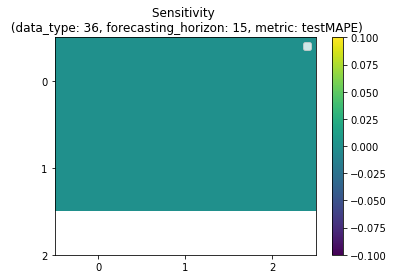

array([[0., 0., 0.],
       [0., 0., 0.]])

In [111]:
sensitivityPlot(['temp_normed_cnnlstm_dataType06'], [36], 15)

,model,data_type,forecasting_horizon,seq_len,img_size,epoch,test_rmse,test_mae,test_mape
4,cnnlstm,12,15,12,11,17.0,10.578651,6.967884,0.196220
5,cnnlstm,12,15,24,11,15.0,10.742620,7.046504,0.200367
2,cnnlstm,12,15,6,11,17.0,10.620720,7.189939,0.197260
6,cnnlstm,12,15,12,21,15.0,10.362549,6.767976,0.195793
1,cnnlstm,12,15,24,21,18.0,10.374760,6.914296,0.194638
7,cnnlstm,12,15,6,21,13.0,10.529471,6.936792,0.194706
0,cnnlstm,12,15,12,41,17.0,10.443773,6.920700,0.195924
3,cnnlstm,12,15,6,41,17.0,10.557812,7.215162,0.195262
